# K-Means Clustering - Scikit-Learn - Part Two

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/DATA/bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
X = pd.get_dummies(df)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(X_scaled)
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

În partea precedentă am văzut cum să creem un model de KMeans Clustering, cum să antrenăm și cum să facem predicții. Acuma apare întrebarea de unde știm că numărul de clustere pe care l-am ales este cel mai potrivit și cum anume putem verifica performanța unui astfel de model cu acea valoare pentru n_clusters?

Cum putem să verificăm un astfel de model este prin calcularea distanței fiecărui punct până la centrul clusterului și să 'pedepsim' valorile care sunt extrem de mari. Cu cât apartenența valorilor la cluster este mai bună, suma acelor distanțe ar trebuie să fie cât mai mică. Totuși acest procedeu are un trade-off, și anume faptul că cu cât avem mai multe clustere cu atât valoarea acelor distanțe este mai mică. Pentru a verifica aceste valori și a le vizualiza putem să utilizăm din nou acel 'elbow method' pe care l-am tot utilizat în acest curs

In [8]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(X_scaled)

    ssd.append(model.inertia_)

Modelul de KMeans Clustering are implementat calculul de distanțe față de centrul clusterului sub formă de atribut și poartă denumirea de 'inertia_'. Pentru fiecare model creat cu valoare diferită pentru hyperparametrul n_clusters putem să adăugăm acea sumă a distanțelor într-o listă

In [9]:
ssd

[2469792.361662754,
 2370786.8620717255,
 2271502.818099976,
 2200694.9396491484,
 2142656.055293296,
 2081027.5835413157,
 2030747.00087708,
 2006610.5128301717]

Aceste valori pe putem afișa sub formă de plot pentru a vedea cum anume arată acele distanțe comparând cu numărul de clustere

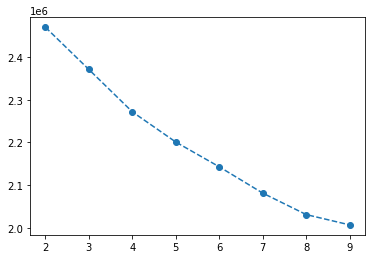

In [16]:
plt.plot(range(2, 10), ssd, '--o')

Din graficul de mai sus se confirmă faptul că valoarea scade atunci când crește numărul de clustere, dar scopul nu este să ajungem la o valoare cât mai mică. Scopul este să găsim un număr potrivit pentru clustere. Se poate observa faptul că scăderea valorii de la 8 la 9 clustere este mult mai mică față de cea de la 2 la 3 clustere. Astfel de zone unde linia este mai aplatizată este un bun indiciu cum că până la acea valoare ar cam trebuie să creem clustere. Din nou, setarea acestei valori depinde de proiect și de cunoștințele în domeniu pe care le avem.

## Recapitulare

În cadrul acestui tutorial am învățat următoarele:

    1. Cum putem să verificăm performanța unui model pentru un anumit k

        model.inertia_

            # returnează suma distanțelor dintre puncte și cluster-ul de care aparțin
    
    2. Pentru a verifica mai multe valori putem utiliza 'elbow method', iar în acest fel și putem să vizualizăm rezultatele